<a href="https://colab.research.google.com/github/Roopan082000/Advance-Python/blob/main/day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part I: Process Automation


Create a file that contains 1000 lines of random strings.

In [ ]:
import random as r
import string as s
filename = "random_strings.txt"
num_lines = 1000
characters = s.ascii_letters + s.digits
with open(filename, "w") as file:
    for _ in range(num_lines):
        rand_str = ''.join(r.choices(characters, k=12))
        file.write(rand_str + "\n")
print(f"File '{filename}' created with {num_lines} random strings.")

File 'random_strings.txt' created with 1000 random strings.


Create a file that contains multiple lines of random strings and file size must be 5 MB.

In [ ]:
import random as r
import string as s
target_size = 5 * 1024 * 1024
filename = "random_strings_5MB.txt"
characters = s.ascii_letters + s.digits
with open(filename, "w") as file:
    current_size = 0
    while current_size < target_size:
        rand_str = ''.join(r.choices(characters, k=12))
        line = rand_str + '\n'
        file.write(line)
        current_size += len(line.encode('utf-8'))
print(f"File '{filename}' created with size approximately {current_size / (1024*1024):.2f} MB.")

File 'random_strings_5MB.txt' created with size approximately 5.00 MB.


Create 10 files that contains multiple lines of random strings and file size of each file must be 5 MB.

In [ ]:
import os
import random
import string
def generate_random_string(length=100):
    chars = string.ascii_letters + string.digits
    return ''.join(random.choices(chars, k=length))
def create_file(filename, target_size_bytes):
    with open(filename, 'w') as f:
        current_size = 0
        while current_size < target_size_bytes:
            line = generate_random_string(random.randint(80, 120)) + '\n'
            f.write(line)
            current_size += len(line)
target_size = 5 * 1024 * 1024
for i in range(1, 11):
    filename = f"file_{i}.txt"
    create_file(filename, target_size)
    print(f"{filename} created with size ~5MB")

file_1.txt created with size ~5MB
file_2.txt created with size ~5MB
file_3.txt created with size ~5MB
file_4.txt created with size ~5MB
file_5.txt created with size ~5MB
file_6.txt created with size ~5MB
file_7.txt created with size ~5MB
file_8.txt created with size ~5MB
file_9.txt created with size ~5MB
file_10.txt created with size ~5MB


Create 5 files of size 1GB, 2GB, 3GB, 4GB and 5GB; file contains multiple lines of random strings.


In [ ]:
import os
import random
import string
def generate_random_string(length=100):
    chars = string.ascii_letters + string.digits
    return ''.join(random.choices(chars, k=length))
def create_file(filename, target_size_bytes):
    with open(filename, 'w') as f:
        current_size = 0
        while current_size < target_size_bytes:
            line = generate_random_string(random.randint(80, 120)) + '\n'
            f.write(line)
            current_size += len(line)
sizes_in_gb = [1, 2, 3, 4, 5]
for size in sizes_in_gb:
    filename = f"file_{size}GB.txt"
    target_size = size * 1024 * 1024 * 1024
    print(f"Creating {filename}...")
    create_file(filename, target_size)
    print(f"{filename} created successfully.")

Creating file_1GB.txt...
file_1GB.txt created successfully.
Creating file_2GB.txt...
file_2GB.txt created successfully.
Creating file_3GB.txt...
file_3GB.txt created successfully.
Creating file_4GB.txt...
file_4GB.txt created successfully.
Creating file_5GB.txt...
file_5GB.txt created successfully.


Convert all the files of Q4 into upper case one by one

In [ ]:
import os
sizes_in_gb = [1, 2, 3, 4, 5]
for size in sizes_in_gb:
    input_file = f"file_{size}GB.txt"
    output_file = f"file_{size}GB_upper.txt"
    print(f"Converting {input_file} to uppercase...")
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            outfile.write(line.upper())
    print(f"{output_file} created.")

Convert all the files of Q4 into upper case parallel using multi-threading

In [ ]:
import os
from concurrent.futures import ThreadPoolExecutor

def to_upper(filename):
    new_file = filename + ".upper"
    print(f"Converting {filename}...")

    with open(filename, 'r') as src, open(new_file, 'w') as dst:
        for line in src:
            dst.write(line.upper())

    print(f"Done: {new_file}")

if _name_ == "_main_":
    filenames = [f"random_{i}GB.txt" for i in range(1, 6)]

    with ThreadPoolExecutor() as executor:
        executor.map(to_upper, filenames)

#Part II: Data Analytics

Q12. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform
the following operations:(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number
rows having missing values.
(ii) Replace all the NA values with the average of the column value.
(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns
having correlation <=0.7.
(iv) Normalize all the values in the dataset between 0 and 10.
(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
np.random.seed(42)  # For reproducibility
data = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(30)])

In [ ]:
# Step (i) - Corrected: Replace all values between [10, 60] with NA
df_replaced = df.mask(df.applymap(lambda x: 10 <= x <= 60))

# Count number of rows having at least one missing value
missing_rows_count = df_replaced.isnull().any(axis=1).sum()
print(f"(i) Number of rows with missing values: {missing_rows_count}")

(i) Number of rows with missing values: 100


/tmp/ipython-input-9-3458166319.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_replaced = df.mask(df.applymap(lambda x: 10 <= x <= 60))


In [ ]:
df_filled = df_replaced.fillna(df_replaced.mean())


In [ ]:
correlation_matrix = df_filled.corr(method='pearson')

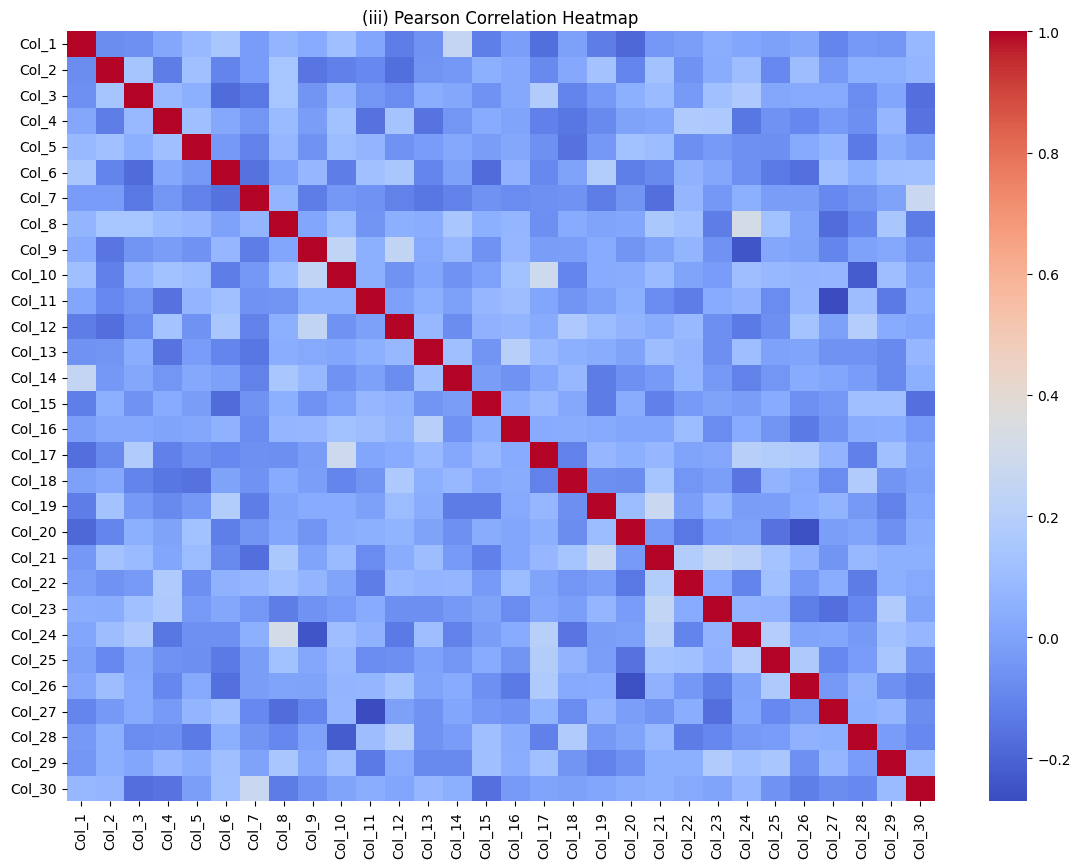

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("(iii) Pearson Correlation Heatmap")
plt.show()

In [ ]:
low_corr_columns = correlation_matrix.columns[(correlation_matrix <= 0.7).all()]
print(f"(iii) Columns with correlation ≤ 0.7 with all other columns:\n{list(low_corr_columns)}")

(iii) Columns with correlation ≤ 0.7 with all other columns:
[]


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 10))
df_normalized = pd.DataFrame(scaler.fit_transform(df_filled), columns=df_filled.columns)

Q13. Create a random dataset of 500 rows and 10 columns.
Columns 1 to 4 are defined between [-10, 10];
Columns 5 to 8 are defined between [10, 20];
Columns 9 to 10 are defined between [-100, 100].
Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric
graph using each algorithm.
(i) K-Mean clustering
(ii) Hierarchical clustering

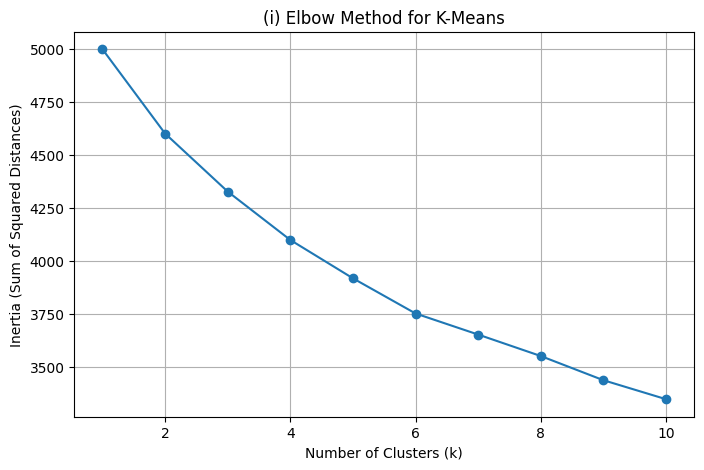

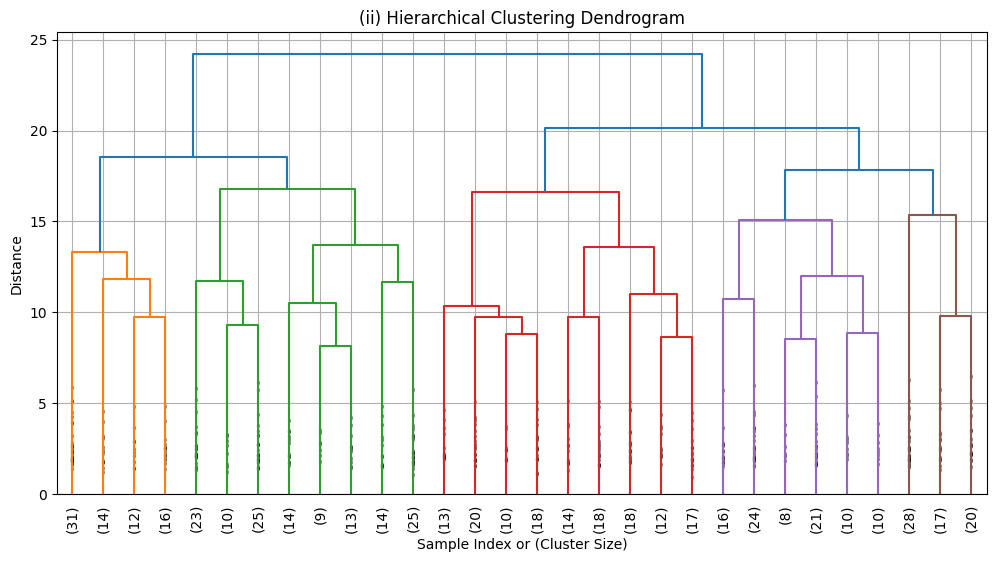

Silhouette Score for KMeans: 0.07005283816707403
Silhouette Score for Hierarchical: 0.04734763135945834


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

# Step 1: Create the dataset
np.random.seed(42)
data = np.hstack([
    np.random.uniform(-10, 10, size=(500, 4)),    # Columns 1–4
    np.random.uniform(10, 20, size=(500, 4)),     # Columns 5–8
    np.random.uniform(-100, 100, size=(500, 2))   # Columns 9–10
])
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(10)])

# Optional: Standardize the data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# ---------------------------
# (i) K-MEANS CLUSTERING
# ---------------------------

# Elbow method to determine optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow graph (Distance Metric: Inertia)
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('(i) Elbow Method for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# Fit KMeans with optimal k (e.g., visually selected)
optimal_k = 3  # You may adjust based on elbow graph
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans = kmeans_final.fit_predict(df_scaled)

# ---------------------------
# (ii) HIERARCHICAL CLUSTERING
# ---------------------------

# Calculate linkage matrix for dendrogram
linked = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title('(ii) Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Optional: Cut the dendrogram at a height or use AgglomerativeClustering for clustering
from sklearn.cluster import AgglomerativeClustering

# Fit Agglomerative Clustering with optimal number of clusters (e.g., 3)
agglo = AgglomerativeClustering(n_clusters=3)
labels_hier = agglo.fit_predict(df_scaled)

# ---------------------------
# (Optional) Cluster comparison using silhouette score
# ---------------------------
print("Silhouette Score for KMeans:", silhouette_score(df_scaled, labels_kmeans))
print("Silhouette Score for Hierarchical:", silhouette_score(df_scaled, labels_hier))

Q14. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100].
Perform the following operations:
(i) Plot scatter graph between Column 5 and Column 6.
(ii) Plot histogram of each column in single graph.
(iii) Plot the Box plot of each column in single graph.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('rand_data.csv')
sns.scatterplot(x=df.iloc[:, 4], y=df.iloc[:, 5])
plt.xlabel('Column 5')
plt.ylabel('Column 6')
plt.title('Scatter Plot between Column 5 and Column 6')
plt.show()

In [ ]:
df = pd.read_csv('rand_data.csv')
plt.figure(figsize=(10, 6))
for col in df.columns:
    sns.histplot(df[col], kde=False, label=col, alpha=0.5, bins=30)
plt.legend()
plt.title('Histogram of Each Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df = pd.read_csv('rand_data.csv')
sns.boxplot(data=df)
plt.title('Box Plot of Each Column')
plt.xlabel('Column')
plt.ylabel('Value')
plt.show()

Q15. Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,10].
Perform the following operations:
(i) Perform t-Test on each column.
(ii) Perform Wilcoxon Signed Rank Test on each column.
(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [ ]:
# Install required package if not available
!pip install -q scipy &> /dev/null

import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums

# Step 1: Generate the dataset
np.random.seed(42)
data = np.random.uniform(5, 10, size=(500, 5))
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(5)])

# (i) Perform One-Sample t-Test on each column
# H0: mean == 7.5 (midpoint of [5,10])
print("📌 (i) One-Sample t-Test Results (mean = 7.5):")
for col in df.columns:
    stat, p = ttest_1samp(df[col], popmean=7.5)
    print(f"{col}: t-stat = {stat:.4f}, p-value = {p:.4f}")

# (ii) Perform Wilcoxon Signed-Rank Test on each column
# H0: median == 7.5
print("\n📌 (ii) Wilcoxon Signed-Rank Test Results (median = 7.5):")
for col in df.columns:
    try:
        stat, p = wilcoxon(df[col] - 7.5)
        print(f"{col}: W-stat = {stat:.4f}, p-value = {p:.4f}")
    except ValueError as e:
        print(f"{col}: Wilcoxon test error - {e}")

# (iii) Two-sample tests between Col_3 and Col_4
print("\n📌 (iii) Two-Sample t-Test (Col_3 vs Col_4):")
t_stat, t_p = ttest_ind(df['Col_3'], df['Col_4'])
print(f"t-stat = {t_stat:.4f}, p-value = {t_p:.4f}")

print("\n📌 (iii) Wilcoxon Rank-Sum Test (Col_3 vs Col_4):")
r_stat, r_p = ranksums(df['Col_3'], df['Col_4'])
print(f"Rank-sum stat = {r_stat:.4f}, p-value = {r_p:.4f}")

📌 (i) One-Sample t-Test Results (mean = 7.5):
Col_1: t-stat = 0.5041, p-value = 0.6144
Col_2: t-stat = -0.7206, p-value = 0.4715
Col_3: t-stat = 0.0366, p-value = 0.9708
Col_4: t-stat = -0.1038, p-value = 0.9173
Col_5: t-stat = -0.1490, p-value = 0.8816

📌 (ii) Wilcoxon Signed-Rank Test Results (median = 7.5):
Col_1: W-stat = 60997.0000, p-value = 0.6145
Col_2: W-stat = 60213.0000, p-value = 0.4555
Col_3: W-stat = 62434.0000, p-value = 0.9529
Col_4: W-stat = 62199.0000, p-value = 0.8951
Col_5: W-stat = 62175.0000, p-value = 0.8893

📌 (iii) Two-Sample t-Test (Col_3 vs Col_4):
t-stat = 0.0999, p-value = 0.9205

📌 (iii) Wilcoxon Rank-Sum Test (Col_3 vs Col_4):
Rank-sum stat = 0.1191, p-value = 0.9052


#Mark Adding

In [ ]:
import csv
file= open('marks.csv.csv','r')
csvreader = csv.reader(file)
header = next(csvreader)
print(header)
for row in csvreader:
  print(row)

FileNotFoundError: [Errno 2] No such file or directory: 'marks.csv.csv'

In [ ]:
import csv
file= open('marks.csv.csv','r')
csvreader = csv.reader(file)
header = next(csvreader)
totalMarks={}
for row in csvreader:
  x=row[0]
  if x in totalMarks:
    totalMarks[x] = totalMarks[x] + int(row[1])
  else:
    totalMarks[x] = int(row[1])
print(totalMarks)